Graphics in Python
====

The foundational package for most graphics in Python is [`matplotlib`](http://matplotlib.org), and the [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/) package builds on this to provide more statistical graphing options. We will focus on these two packages, but there are many others if these don't meet your needs.

1. Matplotlib [basics](#plots)<br>
  a. [Lines](#lines)<br>
  b. [Histogram](#hist)<br>
  c. [Scatter](#scatter)<br>
  d. [Boxplot](#box)<br>
  e. [Custom](#custom)<br>
  f. [Plot Layouts](#layout)<br>
2. [Seaborn](#seaborn)
3. [Review Problems](#hmk)

Resources
----

- [Matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
- [Matplotlib gallery](http://matplotlib.org/1.2.1/gallery.html)
- [Seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html#example-gallery)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Matplotlib<a id='plots'></a>
----

Matplotlib has a "functional" interface similar to Matlab via the `pyplot` module for simple interactive use, as well as an object-oriented interface that is useful for more complex graphic creations.

Lines<a id='lines'></a>
----

In [32]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

In [33]:
x, y

(array([ 0.        ,  0.06346652,  0.12693304,  0.19039955,  0.25386607,
         0.31733259,  0.38079911,  0.44426563,  0.50773215,  0.57119866,
         0.63466518,  0.6981317 ,  0.76159822,  0.82506474,  0.88853126,
         0.95199777,  1.01546429,  1.07893081,  1.14239733,  1.20586385,
         1.26933037,  1.33279688,  1.3962634 ,  1.45972992,  1.52319644,
         1.58666296,  1.65012947,  1.71359599,  1.77706251,  1.84052903,
         1.90399555,  1.96746207,  2.03092858,  2.0943951 ,  2.15786162,
         2.22132814,  2.28479466,  2.34826118,  2.41172769,  2.47519421,
         2.53866073,  2.60212725,  2.66559377,  2.72906028,  2.7925268 ,
         2.85599332,  2.91945984,  2.98292636,  3.04639288,  3.10985939,
         3.17332591,  3.23679243,  3.30025895,  3.36372547,  3.42719199,
         3.4906585 ,  3.55412502,  3.61759154,  3.68105806,  3.74452458,
         3.8079911 ,  3.87145761,  3.93492413,  3.99839065,  4.06185717,
         4.12532369,  4.1887902 ,  4.25225672,  4.3

### Simplest plot

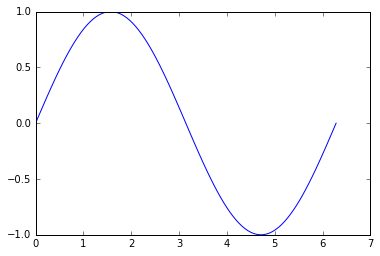

In [34]:
plt.plot(x, y)

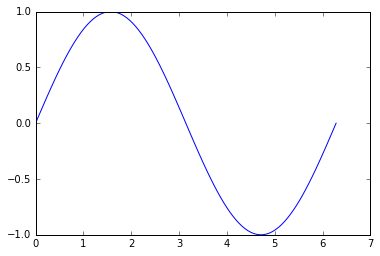

In [35]:
plt.plot(x, y)
plt.show()   # always include this to avoid printing. Sometimes people use pass

### Change boundaries
`xlim(), ylim()`

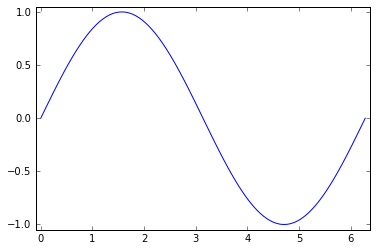

In [36]:
plt.plot(x, y)
plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)
plt.show()

### Add labels
`title(), xlabel(), ylabel()`

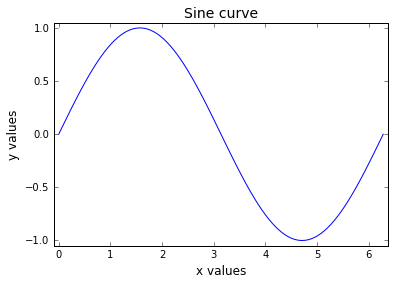

In [37]:
plt.plot(x, y)
plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)
plt.title("Sine curve", size = 14)
plt.xlabel("x values", size = 12)
plt.ylabel("y values", size = 12)
plt.show()

### Make presentable
`linewidth = 1.5, alpha = 0.6, grid(True), xticks(), yticks()` and add some $\LaTeX$

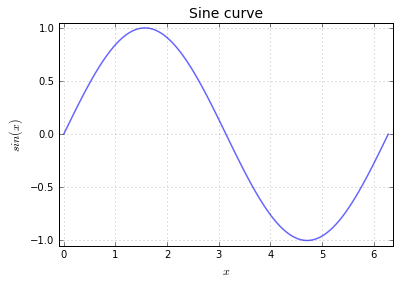

In [38]:
plt.plot(x, y, alpha = 0.6, linewidth = 1.5)
plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)
plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)
plt.grid(True, alpha = 0.5, color = 'black')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

### Final edits
remove ticks with `tick_params()` and add background color with `subplot(axisbg='whitesmoke')`

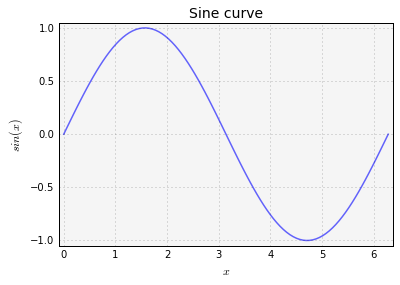

In [39]:
plt.subplot('111', axisbg='whitesmoke')
plt.plot(x, y, alpha = 0.6, linewidth = 1.5)
plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)
plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)
plt.grid(True, alpha = 0.5, color = 'black')
plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  
plt.show()

### Add multiple plots onto same canvas

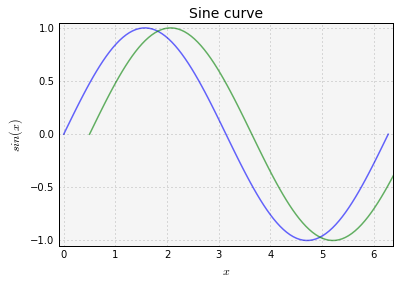

In [40]:
plt.subplot('111', axisbg='whitesmoke')

plt.plot(x, y, alpha = 0.6, linewidth = 1.5)
plt.plot(x + 0.5, y, alpha = 0.6, linewidth = 1.5, color = 'green')

plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

### Should probably add a legend
`legend()`

2 approaches:
<ul>
<li>Add <code>label = some_name</code> to each plot
<li>Called <code>legend(['line1_name','line2_name'])</code>
</ul>

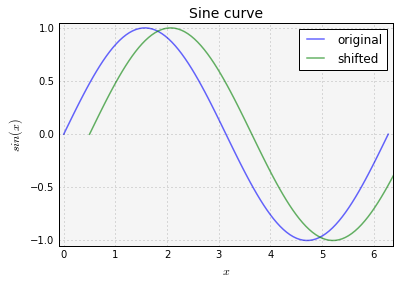

In [41]:
plt.subplot('111', axisbg='whitesmoke')

# first approach - add label to each plot
plt.plot(x, y, alpha = 0.6, linewidth = 1.5, label = 'original')
plt.plot(x + 0.5, y, alpha = 0.6, linewidth = 1.5, color = 'green', label = 'shifted')

plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.legend(loc='best')
#plt.legend(['original','shifted'])

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

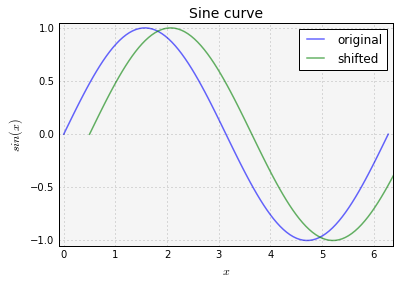

In [42]:
plt.subplot('111', axisbg='whitesmoke')

# second approach - add label to the legend() directly
plt.plot(x, y, alpha = 0.6, linewidth = 1.5)
plt.plot(x + 0.5, y, alpha = 0.6, linewidth = 1.5, color = 'green')

plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.legend(['original','shifted'])

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

### Can do lots of this in automated way

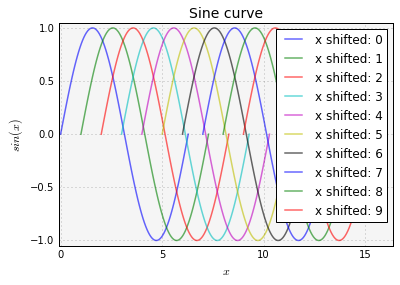

In [43]:
plt.subplot('111', axisbg='whitesmoke')

n_plots = 10
for i in range(n_plots):
    plt.plot(x + i, y, alpha = 0.6, linewidth = 1.5, label = 'x shifted: {}'.format(i))
    
plt.xlim(min(x) - 0.1 ,max(x + n_plots) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.legend(loc='best')

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

### Now let's change the figure size

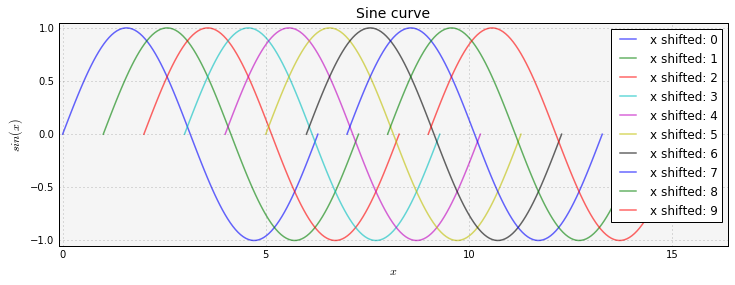

In [44]:
plt.figure(figsize=(12,4))
plt.subplot('111', axisbg='whitesmoke')

n_plots = 10
for i in range(n_plots):
    plt.plot(x + i, y, alpha = 0.6, linewidth = 1.5, label = 'x shifted: {}'.format(i))
    
plt.xlim(min(x) - 0.1 ,max(x + n_plots) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.legend(loc='best')

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

### Add in grid lines

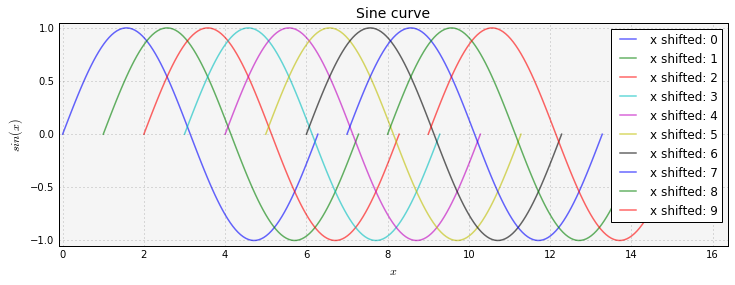

In [45]:
plt.figure(figsize=(12,4))
plt.subplot('111', axisbg='whitesmoke')

n_plots = 10
for i in range(n_plots):
    plt.plot(x + i, y, alpha = 0.6, linewidth = 1.5, label = 'x shifted: {}'.format(i))
    
plt.xlim(min(x) - 0.1 , max(x + n_plots) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.legend(loc='best')

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(np.arange(0,max(x + n_plots),2), size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

### Back to our 2 sine curve example, let's find the x value associate with the highest point of the original curve
`vlines()`

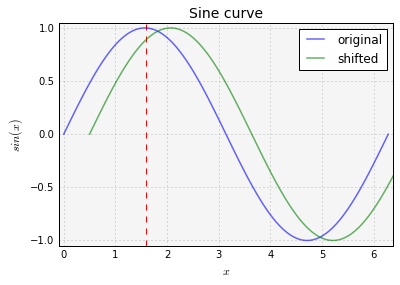

In [46]:
plt.subplot('111', axisbg='whitesmoke')

plt.plot(x, y, alpha = 0.6, linewidth = 1.5, label = 'original')
plt.plot(x + 0.5, y, alpha = 0.6, linewidth = 1.5, color = 'green', label = 'shifted')
plt.vlines(x = x[np.argmax(y)],
           ymin = min(y) - 0.05,
           ymax = max(y) + 0.05,
           color = 'red',
           linestyle = '--',
           linewidth = 1)

plt.xlim(min(x) - 0.1 ,max(x) + 0.1)
plt.ylim(min(y) - 0.05, max(y) + 0.05)

plt.title("Sine curve", size = 14)
plt.xlabel(r"$x$", size = 12)
plt.ylabel(r"$sin(x)$", size = 12)

plt.legend(loc='best')

plt.grid(True, alpha = 0.5, color = 'black')

plt.xticks(size=10)
plt.yticks(size=10)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  

plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Shade the area enclosed by the two functions, `y1` and `y2`:<br>

```python
x = np.linspace(-6,6,100)
y1 = 2*x+10
y2 = x**2
```


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

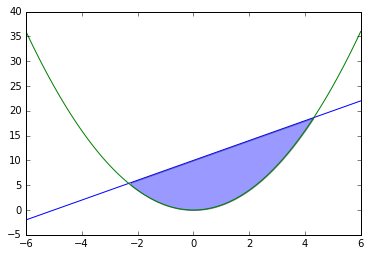

In [92]:
## SOLUTION

x = np.linspace(-6,6,100)
y1 = 2*x+10
y2 = x**2

plt.plot(x,y1)
plt.plot(x,y2)
plt.fill_between(x, y1, y2, where = y1>y2, alpha=0.4) 
pass

Histograms<a id='hist'></a>
---
<ul>
<li>Very useful tool in exploratory data analysis
<li>Find frequency, either by count or proportion, of some event
<li>Approximates a probability distribution (by decreasing the size of the bins)
</ul>

In [49]:
xvals = np.random.randn(1000)

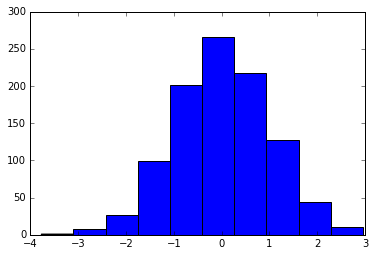

In [50]:
plt.hist(xvals) # no 2nd variable necessary. defaults to 10 bins
plt.show()

### Increasing number of bins
Check out the y axis!

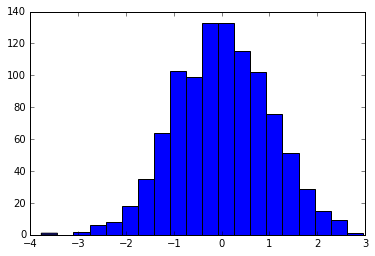

In [51]:
plt.hist(xvals, bins=20)
plt.show()

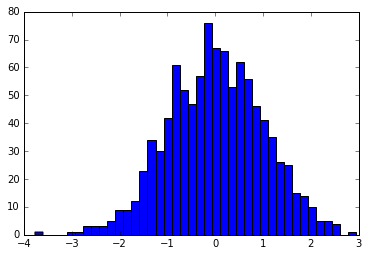

In [52]:
plt.hist(xvals, bins=40)
plt.show()

## A short lesson on probability distributions!

<ul>
<li>In general, histograms are used to approximate *true*, continuous probability distributions
<li>Another name for this is a **density**
<li>Densities are **continuous**, meaning they exist for every single value possible. There are an infinite number of possible values. For example, between 1 and 2, there is 1.01, 1.001, 1.0001, 1.0001, ... etc forever
<li>In the real world, we don't have access to every single value, only **discrete** values, i.e. 1, 1.1, 1.01, 1.001
<li>Using basic geometry and multiplication, histograms approximate curves (remember calculus?)
<li>As we increase the number of bins, we get closer to the true distribution
</ul>

### Find the area under the histogram
Similar to finding area of each bar

(array([   1.,    8.,   26.,   99.,  202.,  266.,  217.,  127.,   44.,   10.]),
 array([-3.76992513, -3.09764479, -2.42536445, -1.7530841 , -1.08080376,
        -0.40852342,  0.26375693,  0.93603727,  1.60831761,  2.28059796,
         2.9528783 ]),
 <a list of 10 Patch objects>)

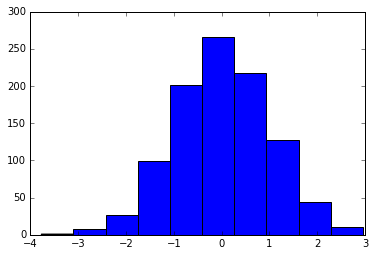

In [53]:
plt.hist(xvals)

In [54]:
x = plt.hist(xvals)[0]
y = plt.hist(xvals)[1]
plt.close()

In [55]:
x, y

(array([   1.,    8.,   26.,   99.,  202.,  266.,  217.,  127.,   44.,   10.]),
 array([-3.76992513, -3.09764479, -2.42536445, -1.7530841 , -1.08080376,
        -0.40852342,  0.26375693,  0.93603727,  1.60831761,  2.28059796,
         2.9528783 ]))

In [56]:
def find_mid(x):
    """ Returns mid point of histogram x-values """
    
    diff = x[:-1] - x[1:]
    return x[:-1] - diff/2    


In [57]:
sum(xvals), sum(find_mid(y)*x)

(13.15105544211648, 13.66863782639086)

In [58]:
percent_diff = lambda x, y: (sum(xvals)-sum(find_mid(y)*x))/sum(xvals)
percent_diff(x,y)

-0.03935671829173603

In [59]:
bins = [10, 20, 100, 500]
for b in bins:
    x = plt.hist(xvals, bins = b)[0]
    y = plt.hist(xvals, bins = b)[1]

    
    print "Percent difference: ", percent_diff(x,y)

plt.close()    

Percent difference:  -0.0393567182917
Percent difference:  0.241802608008
Percent difference:  -0.0291327427899
Percent difference:  -0.012774381987


### Histogram customizations
`bin` can also take in range of values

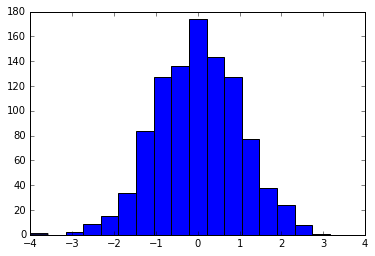

In [60]:
#plt.hist(xvals, bins = np.arange(-4,4))         # bad
plt.hist(xvals, bins = np.linspace(-4,4,20))     # better
plt.show()

### Frequency vs proportion
<ul>
<li>Frequency = counts => numbers > 0
<li>Proportion = probabilities => %'s between 0 and 1. Use `normed=True` but be careful what this does!
</ul>

In [61]:
normed = plt.hist(xvals, bins = np.linspace(-5,5,20), normed = True)[0]
bins = plt.hist(xvals, bins = np.linspace(-5,5,20), normed = True)[1]
plt.close()

In [62]:
sum(normed)  # huh?

1.9000000000000006

In [63]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [64]:
sum(normed*np.diff(bins))

1.0000000000000002

### Convert Frequency to Proportion

In [65]:
normed

array([ 0.    ,  0.    ,  0.0019,  0.0019,  0.0171,  0.0342,  0.114 ,
        0.2584,  0.3078,  0.4085,  0.3325,  0.2337,  0.1178,  0.0608,
        0.0095,  0.0019,  0.    ,  0.    ,  0.    ])

In [66]:
counts = plt.hist(xvals, bins = np.linspace(-5,5,20))[0]
plt.close()

In [67]:
counts

array([   0.,    0.,    1.,    1.,    9.,   18.,   60.,  136.,  162.,
        215.,  175.,  123.,   62.,   32.,    5.,    1.,    0.,    0.,    0.])

In [68]:
counts/sum(counts*np.diff(bins))

array([ 0.    ,  0.    ,  0.0019,  0.0019,  0.0171,  0.0342,  0.114 ,
        0.2584,  0.3078,  0.4085,  0.3325,  0.2337,  0.1178,  0.0608,
        0.0095,  0.0019,  0.    ,  0.    ,  0.    ])

### Now we can customize as before
`title()`, `xticks()`, `grid()`, ....

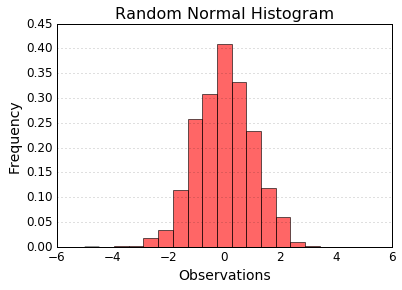

In [69]:
plt.hist(xvals, bins=np.linspace(-5,5,20), color = 'red', alpha = 0.6, normed = True)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  
plt.title("Random Normal Histogram", size=16)
plt.ylabel("Frequency", size=14)
plt.xlabel("Observations", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.gca().yaxis.grid(True, alpha = 0.5)
plt.show()

### Add a crazy friend

In [70]:
crazyvals = 2*np.random.randn(1000) + 1

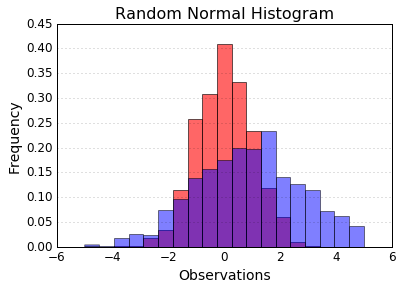

In [71]:
plt.hist(xvals, bins=np.linspace(-5,5,20), color = 'red', alpha = 0.6, normed = True)
plt.hist(crazyvals, bins=np.linspace(-5,5,20), color = 'blue', alpha = 0.5, normed = True)
plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  
plt.title("Random Normal Histogram", size=16)
plt.ylabel("Frequency", size=14)
plt.xlabel("Observations", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.gca().yaxis.grid(True, alpha = 0.5)
plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

To the chart above, for each histogram:
<ul>
<li>add a vertical line
<li>dotted and dashed (i.e. one for each histogram)
<li>of the same color as the histogram
<li>of line thickness 1.5
<li>going to the top of the box
<li>located at the mean of each distribution
<li>and a legend indicating which vertical line is for which histogram
</ul>

Feel free to copy and paste the code from above.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

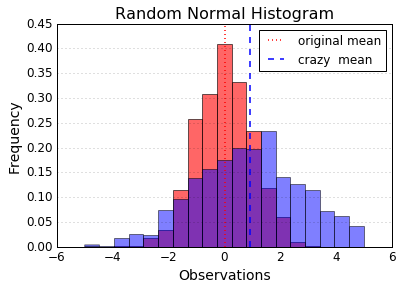

In [84]:
## SOLUTION

plt.hist(xvals, bins=np.linspace(-5,5,20), color = 'red', alpha = 0.6, normed = True)
plt.hist(crazyvals, bins=np.linspace(-5,5,20), color = 'blue', alpha = 0.5, normed = True)

plt.vlines(x = np.mean(xvals),
           ymin = 0,
           ymax = 0.45,
           color = 'red',
           linestyle = 'dotted',
           linewidth = 1.5,
           label = 'original mean')

plt.vlines(x = np.mean(crazyvals),
           ymin = 0,
           ymax = 0.45,
           color = 'blue',
           linestyle = 'dashed',
           linewidth = 1.5,
           label = 'crazy  mean')

plt.legend(loc='best')

plt.tick_params(axis='both', bottom='off', top='off', right ='off', left = 'off')  
plt.title("Random Normal Histogram", size=16)
plt.ylabel("Frequency", size=14)
plt.xlabel("Observations", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.gca().yaxis.grid(True, alpha = 0.5)
plt.show()

Scatter plots<a id='scatter'></a>
---

<ul>
<li>Nice when plotting two dimensional data points
<li>Can be used to describe a 3rd dimension - color of dot
<li>Can be used to describe a 4th dimension - size of dot
<li>Not too many instances which this is good for more than 2-3 dimensions 
</ul>

In [916]:
x = np.random.uniform(0.1, 0.9, (2,100))

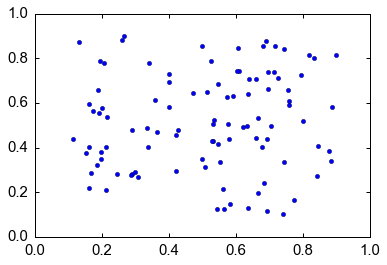

In [917]:
plt.scatter(x[0],x[1])
plt.show()

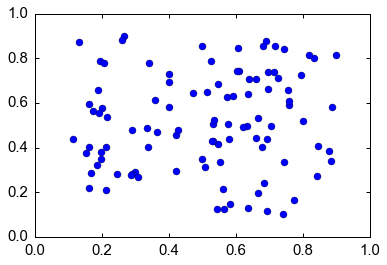

In [918]:
plt.scatter(x[0], x[1], s = 50)
plt.show()

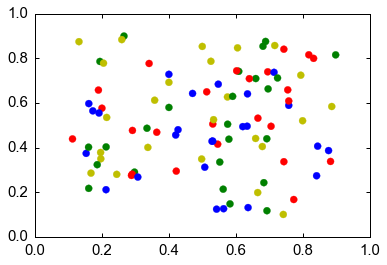

In [919]:
plt.scatter(x[0], x[1], s = 50, color=['r','g','b','y'])
plt.show()

### Cluster by color based on some size

In [924]:
def cluster(x, y):
    
    if x > 0.5:
        if y > 0.5:
            return 'r'
        else:
            return 'g'
    else:
        if y > 0.5:
            return 'b'
        else:
            return 'y'


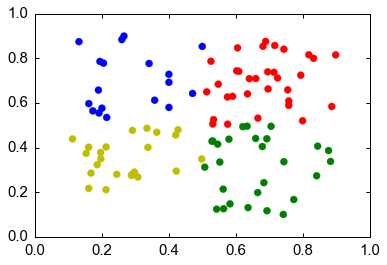

In [928]:
plt.scatter(x[0], x[1], s = 50, color = [cluster(x[0][i],x[1][i]) for i in range(len(x[0]))])
plt.show()

### Change sizes automatically

In [944]:
def size_dimension(x, y):
    
    if x > 0.5:
        if y > 0.5:
            return 100
        else:
            return 70
    else:
        if y > 0.5:
            return 20
        else:
            return 220
    

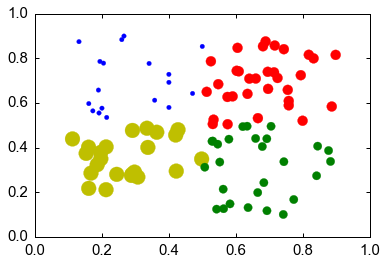

In [945]:
plt.scatter(x[0], x[1], 
            s = [size_dimension(x[0][i],x[1][i]) for i in range(len(x[0]))], 
            color = [cluster(x[0][i],x[1][i]) for i in range(len(x[0]))])
plt.show()

### Scale of colors - like a heatmap

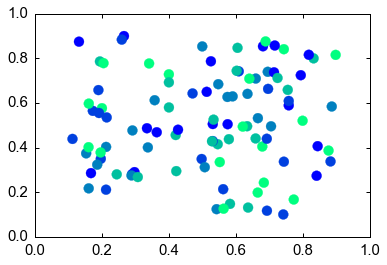

In [1145]:
colors = plt.cm.winter(np.linspace(0, 1, 5))

plt.scatter(x[0], x[1], color = colors, s=100)
plt.show()

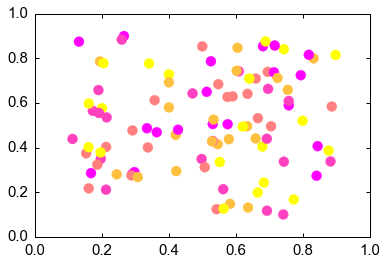

In [1149]:
colors = plt.cm.spring(np.linspace(0, 1, 5))

plt.scatter(x[0], x[1], color = colors, s=100)
plt.show()

In [1113]:
dir(plt.cm)

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 'LUTSIZE',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 'ScalarMappable',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_r',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '

In [947]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [959]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [986]:
def cluster_fare(x, threshold):
    
    if x > threshold:
        return 'r'
    else:
        return 'b'

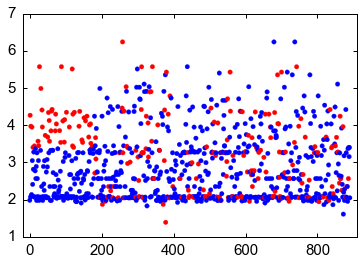

In [987]:
plt.scatter(titanic.index, np.log(titanic.fare), color = [cluster_fare(i, threshold = 30) for i in titanic.fare])
plt.xlim(-20, len(titanic) + 20)
plt.show()

## Box plots<a id='box'></a>

<ul>
<li>Used heavily in statistics
<li>Median, quantile, outliers
</ul>

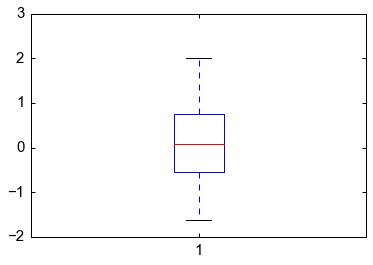

In [1088]:
boxvals = np.random.randn(100)
plt.boxplot(boxvals)
plt.show()

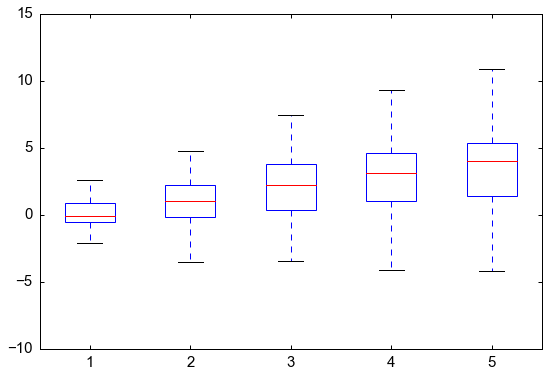

In [1105]:
boxplots = [(np.sqrt(i)+1)*np.random.randn(100) + i for i in range(5)]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplots, patch_artist=True)

plt.show()

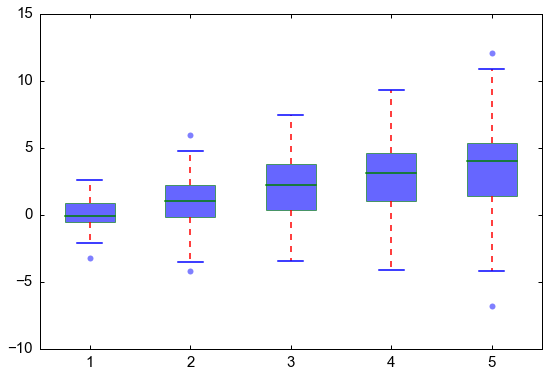

In [1106]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplots, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='g', linewidth = 1)
    # change fill color
    box.set( facecolor = 'b', alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='r', linewidth = 1.5)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='b', linewidth = 1.5)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='g', linewidth = 1.5)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='b', alpha=0.5)
    
plt.show()

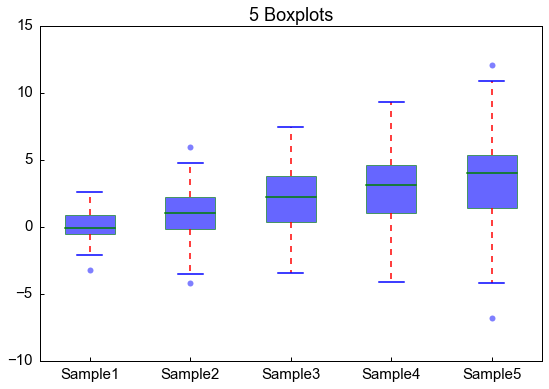

In [1107]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplots, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='g', linewidth = 1)
    # change fill color
    box.set( facecolor = 'b', alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='r', linewidth = 1.5)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='b', linewidth = 1.5)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='g', linewidth = 1.5)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='b', alpha=0.5)

ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title("5 Boxplots")

plt.show()

In [1156]:
male_fare = titanic[titanic.sex == 'male'].fare
female_fare = titanic[titanic.sex == 'female'].fare

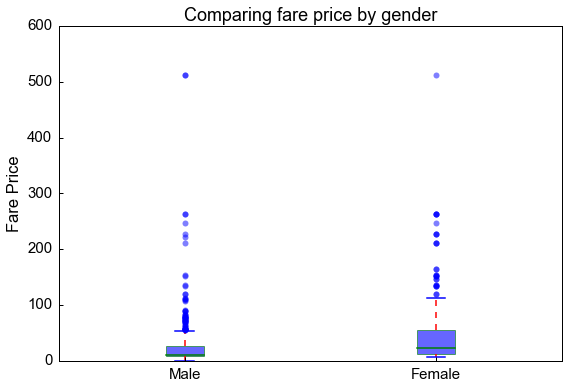

In [1180]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot([male_fare,female_fare], patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='g', linewidth = 1)
    # change fill color
    box.set( facecolor = 'b', alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='r', linewidth = 1.5)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='b', linewidth = 1.5)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='g', linewidth = 1.5)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='b', alpha=0.5)

ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel("Fare Price")
ax.set_title("Comparing fare price by gender")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

pass

### Styles

In [1182]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [1184]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

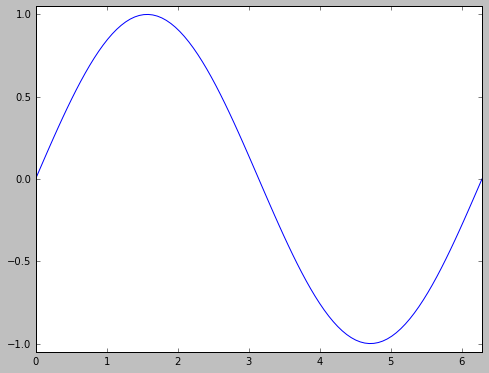

In [1185]:
with plt.style.context('classic'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

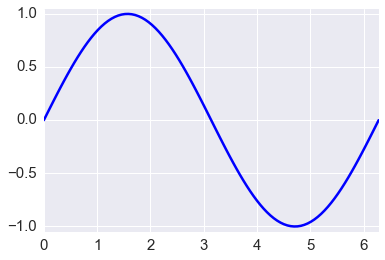

In [1245]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

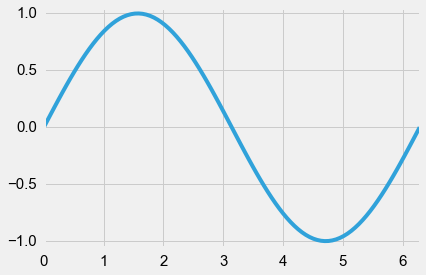

In [1186]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

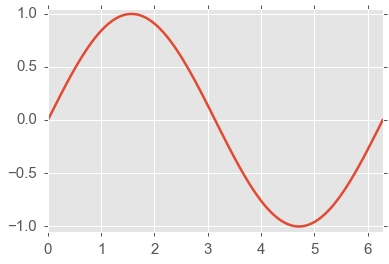

In [1187]:
with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

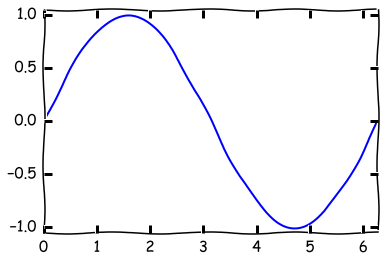

In [1188]:
with plt.xkcd():
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

Plot layouts<a id='layout'></a>
----
<ul>
<li>Create a grid of subplots
<li>Can iterate over grid and position plots
</ul>

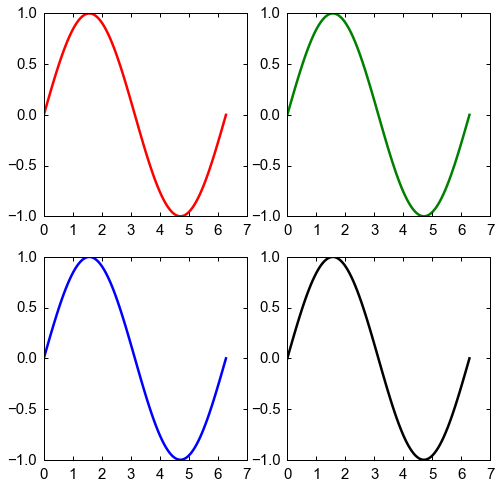

In [1271]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

axes[0,0].plot(x, y, 'r')
axes[0,1].plot(x, y, 'g')
axes[1,0].plot(x, y, 'b')
axes[1,1].plot(x, y, 'k')

plt.show()

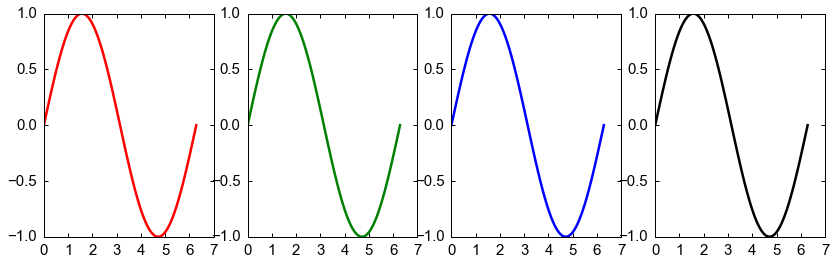

In [1322]:
fig, axes = plt.subplots(1, 4, figsize=(14,4))

axes[0].plot(x, y, 'r')
axes[1].plot(x, y, 'g')
axes[2].plot(x, y, 'b')
axes[3].plot(x, y, 'k')

plt.show()
#plt.tight_layout()

In [1323]:
np.array(colors)=='r'

array([ True, False, False, False], dtype=bool)

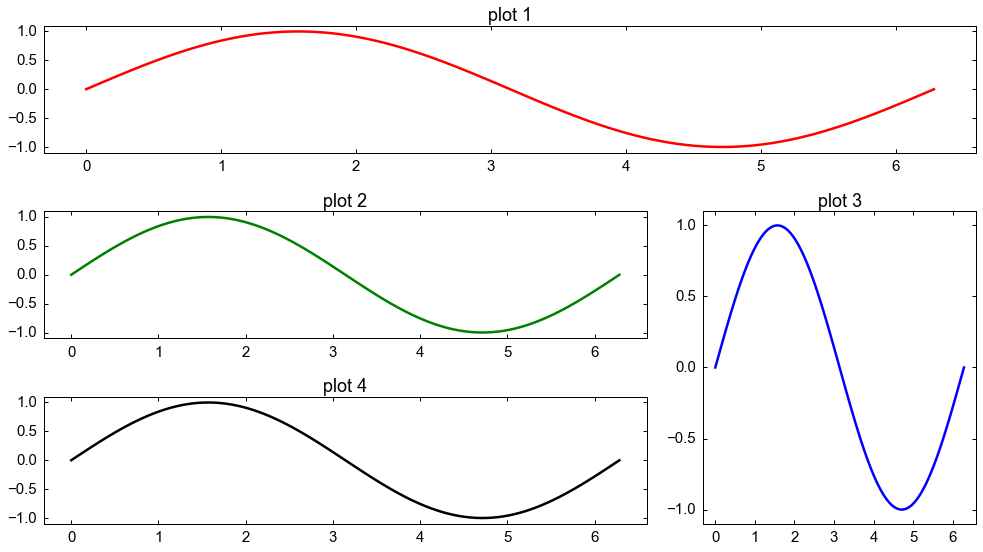

In [1346]:
fig, axes = plt.subplots(1,4,figsize=(14,8))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0), colspan=2)

axes = [ax1, ax2, ax3, ax4]
colors = np.array(['r', 'g', 'b', 'k'])

for ax, c in zip(axes, colors):
    ax.plot(x, y, c)
    ax.margins(0.05)
    ax.set_title("plot {}".format(1 + np.where(colors==c)[0][0]))
    
plt.tight_layout()

Seaborn<a id='seaborn'></a>
----

<ul>
<li>Built on top of `matplotlib`
<li>Many more statistical plots
</ul>

In [1347]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import numpy.random as rng

#### Density plots

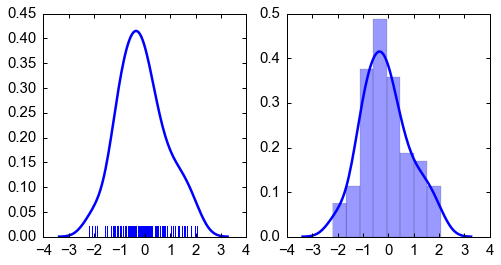

In [1348]:
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

#### Kernel density estimate

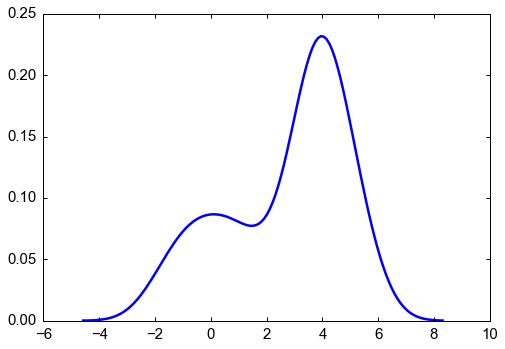

In [1349]:
sns.kdeplot(np.r_[rng.normal(0,1,50), rng.normal(4,0.8,100)])
pass

In [1350]:
iris = sns.load_dataset('iris')

In [1351]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Joint distribution plot

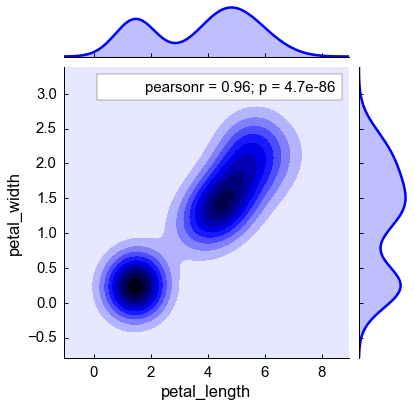

In [1352]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kdeplot')
pass

#### Box and violin plots

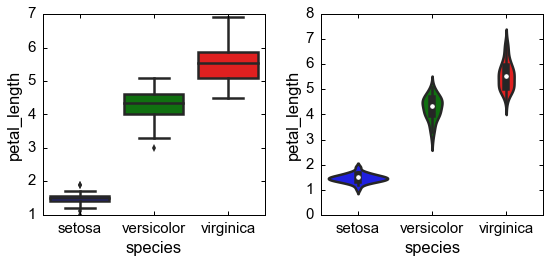

In [1359]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.boxplot(x='species', y='petal_length', data=iris, ax=axes[0])
sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[1])
plt.tight_layout()
pass

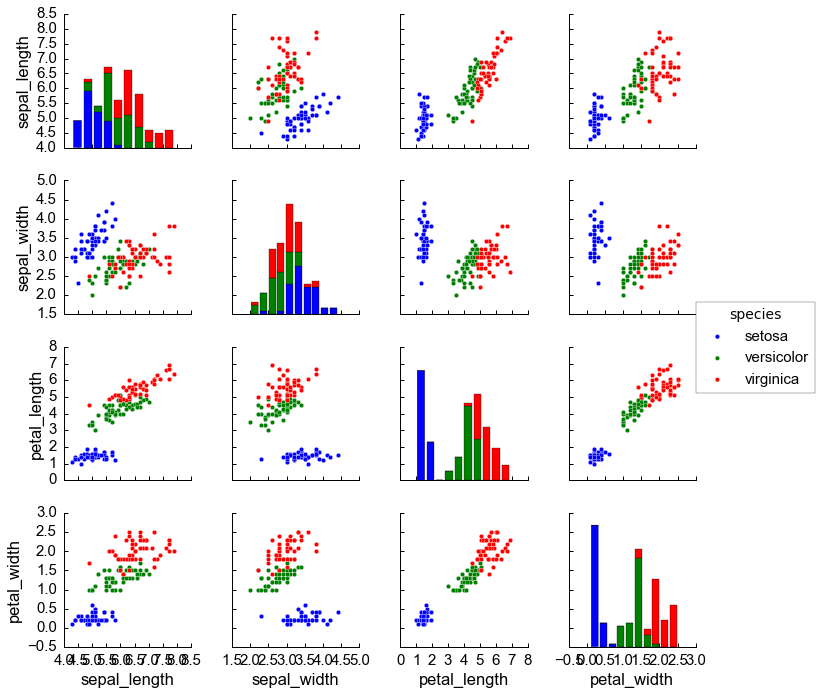

In [1374]:
sns.pairplot(iris, hue="species")
pass

# Review Problems<a id='hmk'></a>

Write code that generates the following figure![figure](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif) using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotlib`.


To make it simpler, I have provided the code for plotting below. All you need to do is to supply the `make_ca` function (which may of course use as many other custom functions as you deem necessary). As you can see from the code below, the `make_ca` function takes 3 arguments
```
rule - an integer e.g. 30
init - an initial state i.e. the first row of the image
niter - the number of iterations i.e. the number of rows in the image
```

In [11]:
from matplotlib.ticker import NullFormatter, IndexLocator

def plot_grid(rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    ax.grid(True, which='major', color='grey', linewidth=0.5)
    ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
    ax.xaxis.set_major_locator(IndexLocator(1, 0))
    ax.yaxis.set_major_locator(IndexLocator(1, 0))
    ax.xaxis.set_major_formatter( NullFormatter() )
    ax.yaxis.set_major_formatter( NullFormatter() )
    ax.set_title('Rule %d' % rule)

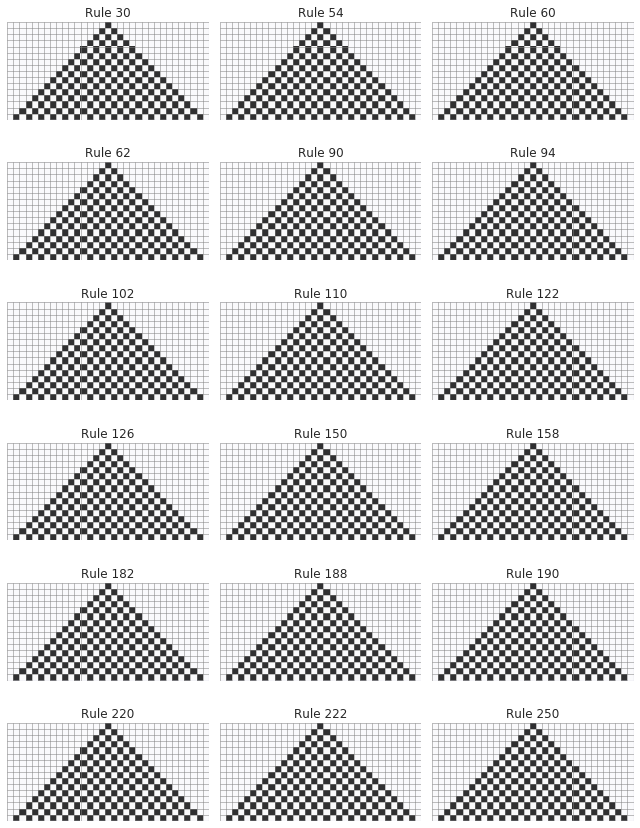

In [14]:
niter = 16
width = niter*2+1
init = np.zeros(width, 'int')
init[width//2] = 1
rules = np.array([30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
                  150, 158, 182, 188, 190, 220, 222, 250]).reshape((-1, 3))

nrows, ncols = rules.shape
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2))
for i in range(nrows):
    for j in range(ncols):
        #grid = make_ca(rules[i, j], init, niter)   ##  this is where your function is called
        plot_grid(rules[i, j], grid, ax=axes[i,j])
plt.tight_layout()

In [12]:
## SOLUTION

def rule_index(left, mid, right):    
    return int(str(left) + str(mid) + str(right),2)

def next_generation(rule, current_gen):
    
    next_gen = np.zeros(len(current_gen))
    ruleset = format(rule,'08b')
    
    for i in range(len(current_gen)-1):
        left = current_gen[i-1]
        mid = current_gen[i]
        right = current_gen[i+1]
        
        next_gen[i] = ruleset[::-1][rule_index(int(left), int(mid), int(right))]
    
    return next_gen

def make_ca(rule, init, niter):

    temp_gen = init
    current_generation = np.zeros(len(init)*niter).reshape(niter,len(init))
    current_generation[0] = init
    for i in range(1,niter):
        current_generation[i] = next_generation(rule, temp_gen)
        temp_gen = current_generation[i]
    
    return current_generation